In [1]:
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Segun distintos benchmarks(papers, kaggle) los algoritmos de uso general que tienen mas veces la mejor performance son:
**Gradient Boosted Trees, Random Forest, SVM**


# **Decision trees**

In [2]:
from sklearn.tree import DecisionTreeRegressor
model =DecisionTreeRegressor(max_depth=2)

In [3]:
from sklearn.model_selection import train_test_split

X= pd.read_csv('C:\\Users\\chris\\Documents\\Jupyter Notebook\\PredIngresosPeliculas\\X_opening.csv')
y= X['worldwide_gross']
X= X.drop(['worldwide_gross'],axis=1)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)


In [5]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [6]:
#conda install -c conda-forge python-graphviz
import graphviz 
from sklearn.tree import export_graphviz

treedot = export_graphviz(model,
                         out_file=None,
                         feature_names=X.columns)
treedot

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="opening_gross <= 41613376.0\\nsquared_error = 4.491994363696598e+16\\nsamples = 1665\\nvalue = 141540319.054"] ;\n1 [label="opening_gross <= 22074047.0\\nsquared_error = 1.3333822193127832e+16\\nsamples = 1506\\nvalue = 92999937.199"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="squared_error = 4923666241203536.0\\nsamples = 1257\\nvalue = 64781848.271"] ;\n1 -> 2 ;\n3 [label="squared_error = 3.147813101998772e+16\\nsamples = 249\\nvalue = 235450289.735"] ;\n1 -> 3 ;\n4 [label="opening_gross <= 70351576.0\\nsquared_error = 1.1039811871593587e+17\\nsamples = 159\\nvalue = 601300162.289"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="squared_error = 4.067538845924509e+16\\nsamples = 92\\nvalue = 440868287.554"] ;\n4 -> 5 ;\n6 [label="squared_error = 1.2226485798747571e+17\\nsamples = 67\\nvalue = 821594676.851"] ;\n4 -> 6 ;\n}'

In [ ]:
graphviz.Source(treedot)

# **ENSEMBLES**

### Concepto general:

Random forest y gradient Boosted Trees forman parte dde una familia de algoritmos que se denominan "ensembles"

    Ensemble = Submodelos -> Entrenamiento -> Predicciones(intermedias) -> Voto ->Prediccion(final)
    
    
#### **Como funciona?**

El algoritmo genera miles de modelos de arboles de decision que seran entrenados sobre conjuntos de datos bootstrapeados del conjunto de datos original y donde para etapa de separacion el **conjunto de features elegibles** sera un subconjunto aleatorio del conjunto original de features

Cada uno de los arboles entrenados, luego podra votar por su prediccion y se promedian esos votos


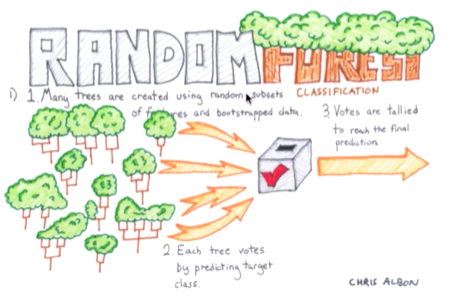


**Ensembles del pobre (poor man's ensemble)**
    - Entrenar diversos modelos a mano
    - Promediar el resultado
    - Owen Zhang, numero 1 de Kaggle ocupaba esta estrategia promediando diversos modelos XGBoost
    - from Sklearn.ensemble import VotingClassifier sirve por ejemplo para hacer un ensemble manual de clasificacion
    
En general los ensembles del pobre funcionan ya que cada uno de los modelos que votaran en conjunto son bastante fuertes

**Porque es poderoso??**

Leo Breiman (creador del random forest) demostro que un ensemble podia tener una buena generalizacion si:

    1. Los submodelos tienen buen poder de prediccion
    2. Los submodelos estan descorrelacionados
    
Asi el random forest compromete un poco de poder de prediccion de cada uno de los decision trees que arma, pero la forma aleatoria de generarlos hace que esten **Fuertemente descorrelacionados**

## **Random Forest**

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate

forest = RandomForestRegressor(200)#cantidad de arboles a generar
results = cross_validate(forest,X,y,cv=5,scoring='r2', return_train_score=True)

In [8]:
test_scores =results['test_score']
train_scores = results['train_score']
print(np.mean(test_scores))
print(np.mean(train_scores))

0.5177938336864185
0.9655173977320898


Mejor resultado que Lasso!, el modelo ya no tiene BIAS y tenemos un mejor score r2. Sin embargo se tiene una diferencia important entre score de entrenamiento y de test **(OVERFIT)**


## **Gradient Boosted Trees**

Ensambla modelos de aprendizaje debil


In [9]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble,X,y,cv=5,scoring='r2', return_train_score=True)

In [10]:
test_scores =results['test_score']
train_scores = results['train_score']
print(np.mean(test_scores))
print(np.mean(train_scores))

0.5272051965383769
0.9151392143549633


Gradient esta mejor optimizado que random pero continua el mismo problema del overfitting




# Optimizacion de hiperparametros

    * Fijar un learning rate alto
    * Fijar parametros de los arboles
    * Fijados estos parametros, elegir el mejor numero de estimadores que conforman el ensemble
    
**Grid Search**

* train_test_split sive para evaluaciones rapidas, testeos y prototipaje

* cross_validate es un metodo mas robusto para poder estimar el rendimiento de tu algoritmo

Sin embargo una vez que ha finalizado la etapa de prototipaje y se quiere establecer un modelo definitivo, es necesario seguire el siguiente flujo:

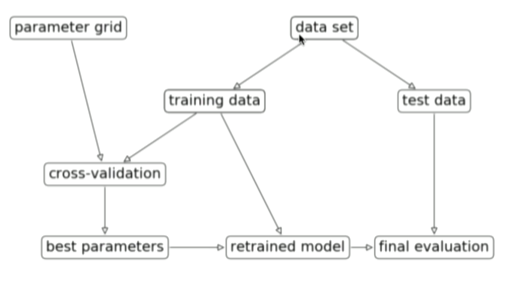



In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [13]:
from sklearn.model_selection import GridSearchCV #mide todos los scores automaticamente haciendo crossvalidation

param_test1 = {'n_estimators': range(20,501,20)}#cuantos modelos de aprendizaje debil se van a generar
param_test1

{'n_estimators': range(20, 501, 20)}

In [14]:
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

In [17]:
estimator= GradientBoostingRegressor(learning_rate=0.1,
                                    min_samples_split=500,
                                    min_samples_leaf=50,
                                    max_depth=8,
                                    max_features='sqrt',
                                    subsample=0.8,
                                    random_state=10)

In [18]:
gsearch1= GridSearchCV(estimator,
                      param_grid= param_test1,
                      scoring='r2',
                      cv=5)

In [19]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             param_grid={'n_estimators': range(20, 501, 20)}, scoring='r2')

In [21]:
list(zip(gsearch1.cv_results_['mean_test_score'],
         gsearch1.cv_results_['std_test_score'], 
         gsearch1.cv_results_['params']))

[(0.6553377167287445, 0.05763723230388878, {'n_estimators': 20}),
 (0.7194707183052496, 0.06255974658122894, {'n_estimators': 40}),
 (0.7347239263041044, 0.06359927761595936, {'n_estimators': 60}),
 (0.7389339055742862, 0.062364772765764416, {'n_estimators': 80}),
 (0.7420485206288181, 0.06271425977283825, {'n_estimators': 100}),
 (0.7459322395926498, 0.06235500960463639, {'n_estimators': 120}),
 (0.7495406754127887, 0.06335029572288611, {'n_estimators': 140}),
 (0.7508197586274827, 0.06304688375599073, {'n_estimators': 160}),
 (0.7525654539309128, 0.0634404813604329, {'n_estimators': 180}),
 (0.753490598609423, 0.06446653281824145, {'n_estimators': 200}),
 (0.7545692717605135, 0.06341510679393178, {'n_estimators': 220}),
 (0.7553059694284988, 0.06488882352873111, {'n_estimators': 240}),
 (0.755171486028867, 0.06572082397934954, {'n_estimators': 260}),
 (0.753885223323653, 0.06495415209551623, {'n_estimators': 280}),
 (0.7546023133872947, 0.06568746888772702, {'n_estimators': 300}),
 (

In [28]:
#mejor estimador = 240
final_results= cross_validate(gsearch1.best_estimator_,X_train,y_train, return_train_score=True)
final_results

{'fit_time': array([0.16278815, 0.17250013, 0.17707896, 0.17649055, 0.1772604 ]),
 'score_time': array([0.        , 0.00200033, 0.00200105, 0.00200057, 0.00300097]),
 'test_score': array([0.70503564, 0.66126336, 0.84330169, 0.79674271, 0.77018645]),
 'train_score': array([0.84023253, 0.84280927, 0.80824339, 0.82833448, 0.82368469])}

In [29]:
test_scores = final_results['test_score']
train_score = final_results['train_score']
print('train score: ',np.mean(train_scores))
print('test score: ',np.mean(test_scores))

train score:  0.9151392143549633
test score:  0.7553059694284988


In [30]:
#se vuelve a generar el modelo pero ahora con datos de entrenamiento e incluyendo el valor del mejor estimador (240)
estimator= GradientBoostingRegressor(learning_rate=0.1,
                                    min_samples_split=500,
                                    min_samples_leaf=50,
                                    max_depth=8,
                                    max_features='sqrt',
                                    subsample=0.8,
                                    random_state=240)

In [31]:
estimator.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                          min_samples_split=500, random_state=240,
                          subsample=0.8)

In [32]:
estimator.score(X_test,y_test)

0.8112351998020706

**Conclusiones:**

*train_test_split*

    Se usa para evaluaciones rápidas, testeos y prototipaje.
    
*cross_validate*

    Es un método más robusto para poder estimar el rendimiento de tu algoritmo